In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from anamoly import Anomaly
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
df = pd.read_csv('sensor.csv').drop('Unnamed: 0', axis=1)
df_origin = df.copy()

### Date Cleaning (Remove Unreliable Sensors)

In [3]:
sensors = [sensor for sensor in df.columns if sensor.startswith('sensor')]
reduced_cols = sensors[:13]+sensors[37:]+['machine_status','timestamp']
reduced_df = df[reduced_cols]

### Model Selection

In [4]:
anomaly = Anomaly(reduced_df)

/home/hossain/Desktop/Eshita academic/Anomaly/anamoly.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['timestamp'] = pd.to_datetime(df['timestamp'])


In [5]:
isolation_forest = IsolationForest()

In [6]:
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_samples': ['auto', 0.8, 1.0],    # Sample size for each tree
    'contamination': [0.01, 0.05, 0.1],   # Expected proportion of outliers
    'max_features': [1.0, 0.8, 0.5],      # Number of features to consider
    'bootstrap': [True, False],           # Whether to bootstrap samples
    'random_state': [42]
}

In [7]:
X_train, X_test, y_train, y_test = anomaly.split_train_test()

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [9]:
best_params = anomaly.find_best_params(isolation_forest, X_val, y_val, param_grid=param_grid)

In [10]:
best_params

{'bootstrap': True,
 'contamination': 0.05,
 'max_features': 0.8,
 'max_samples': 'auto',
 'n_estimators': 50,
 'random_state': 42}

### Train and Evaluate Model

In [11]:
isolation_forest_best = IsolationForest(**best_params)

In [12]:
isolation_forest.fit(X_train)

IsolationForest()

In [13]:
isolation_forest_preds = isolation_forest.predict(X_test)

              precision    recall  f1-score   support

     Anomaly       0.75      1.00      0.86      1439
      Normal       1.00      0.98      0.99     20593

    accuracy                           0.98     22032
   macro avg       0.88      0.99      0.92     22032
weighted avg       0.98      0.98      0.98     22032



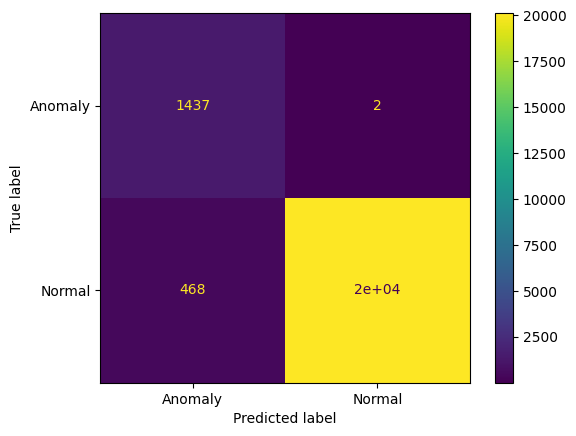

In [14]:
anomaly.evaluation(isolation_forest_preds, y_test)

Discuss the result